<h3>Matplotlib</h3>  <i>This section demonstrates examples of using matplotlib graphing library.  For practice&rsquo;s sake, read the code snippets and consider (a) changing the data source, such as reading in from a file, (b) the visual elements (font, color, size of lines, text), and perhaps writing a funcution altering the data, as if you performed some other kinds of analysis.</i>  <br />For more specifics on how color is treated in matplotlib (version 3.0.0) see <a href="https://matplotlib.org/gallery/color/colormap_reference.html" target="new">here</a>.
These examples are extracted from the matplotlib documentation.
<hr />
Some of the types of visualizations:  
<ul><li>lineplot <code>plot()</code></li>
    <li>subplot <code>subplot()</code></li>
    <li>images <code>imshow()</code></li>
    <li>contouring &amp; pseudocolor <code>pcolormesh()</code> and <code>contour()</code></li>
    <li>histogram <code>hist()</code></li>
    <li>paths <code>matplotlib.path</code> module</li>
    <li>3d plotting <code>mplot3d</code> toolkit</li>
    <li>lineplot <code>plot()</code></li>
    <li>streamplot (vector field) <code>streamplot()</code></li>
    <li>ellipses <code>matplotlib.patches.Arc()</code></li>
    <li>lineplot <code>plot()</code></li>
    <li>bar charts <code>bar()</code></li>
    <li>pie charts <code>pie()</code></li>
    <li>tables <code>table()</code></li>
    <li>scatter <code>scatter()</code></li>
    <li>GUI widgets <code>matplotlib.widgets</code></li>
    <li>lineplot <code>plot()</code></li>
    <li>filled areas <code>fill()</code></li>
    <li>plotting with custom ticks  <code>matplotlib.ticker and matplotlib.dates</code></li>
    <li>log plots <code>semilogx(), semilogy(), loglog()</code></li>
    <li>polar plots <code>polar()</code></li>
    <li>adding legends to plots <code>legend()</code></li>
    <li>TeX-notation <code>matplotlib.mathtext</code></li>
    <li>And more!</li></ul>

<h4 style="color:olive;">Lineplot</h4>

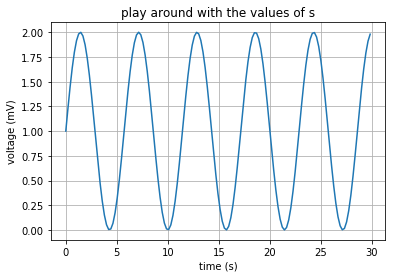

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline   
# the above line allows the plot to appear in the notebook

# Data for plotting - alter these values to see the differences in the plot.
t = np.arange(0.0, 30.0, 0.21)
s = 1 + np.sin(.35 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='play around with the values of s for fun changes')
ax.grid()

fig.savefig("test.png")
plt.show()

<h4 style="color:olive;">Interpolating Data (heatmap version)</h4>
The center of the pixel at <code>A[i,j]</code> is plotted at <code>i+0.5</code>, <code>i+0.5</code>. If you are using <code>interpolation='nearest'</code>, the region bounded by (i,j) and (i+1,j+1) will have the same color. If you are using interpolation, the pixel center will have the same color as it does with nearest, but other pixels will be interpolated between the neighboring pixels.

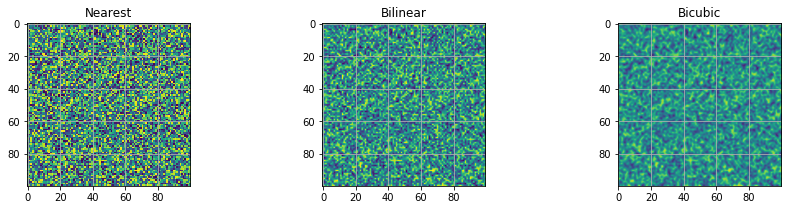

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline   
# the above line allows the plot to appear in the notebook

A = np.random.rand(100, 100)  # a NumPy array

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)

plt.show()

<h4 style="color:olive">Colormap demos</h4>
Colormaps are already defined by matplotlib.  Here is the dictionary of predefined color sets.  
Try replacing the <code>cm.xxxxx</code> in the below sample.

<pre style="font-size:10px">cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]
</pre>

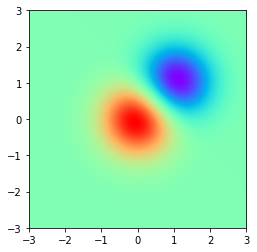

In [4]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# see https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
# for various interpolation methods!
# replace the interpolation value below with one of these and see ...
# none, nearest, bilinear, bicubic, sinc, lanczos, gaussian ... and others
# try changing the data values, too, to sense the interplay of data 
# and their visual representation.  
# [Yes, "data" are plural; "datum" is singular.]
fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bessel', cmap=cm.rainbow,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

<hr/><h4>Scatter Plots</h4>  Experiment with the color, the x,y axes, subplots, etc.  There are several variants of these plots with matplotlib!

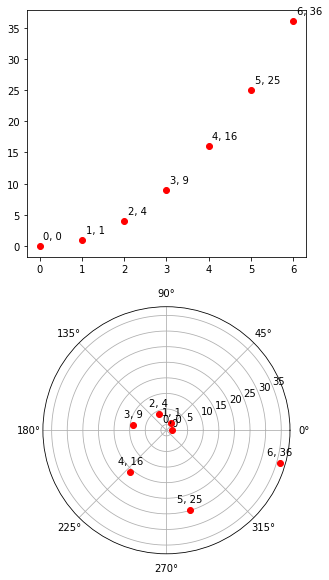

In [10]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
%matplotlib inline   
# the above line allows the plot to appear in the notebook

xs = np.arange(7)
ys = xs**2

fig = plt.figure(figsize=(5, 10))
ax = plt.subplot(2, 1, 1)

# If we want the same offset for each text instance,
# we only need to make one transform.  To get the
# transform argument to offset_copy, we need to make the axes
# first; the subplot command above is one way to do this.
trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       x=0.05, y=0.10, units='inches')

for x, y in zip(xs, ys):
    plt.plot((x,), (y,), 'ro')
    plt.text(x, y, '%d, %d' % (int(x), int(y)), transform=trans_offset)


# offset_copy works for polar plots also.
ax = plt.subplot(2, 1, 2, projection='polar')

trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       y=6, units='dots')

for x, y in zip(xs, ys):
    plt.polar((x,), (y,), 'ro')
    plt.text(x, y, '%d, %d' % (int(x), int(y)),
             transform=trans_offset,
             horizontalalignment='center',
             verticalalignment='bottom')

plt.show()

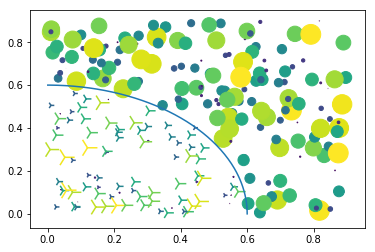

In [8]:
# this example is based on 
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_masked.html#sphx-glr-gallery-lines-bars-and-markers-scatter-masked-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(1388888) #original: 19680801


N = 250
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii

c = np.sqrt(area)
r = np.sqrt(x * x + y * y)

area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)

# check out the way we can represent images!
# https://matplotlib.org/api/markers_api.html?highlight=marker#module-matplotlib.markers
# replace ^ and o with [. o v < > 1 2 3 4 8 s p P * h H +]
# imagine using 2, 3, 4 for 
plt.scatter(x, y, s=area2, marker='4', c=c)
plt.scatter(x, y, s=area1, marker='o', c=c)

# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

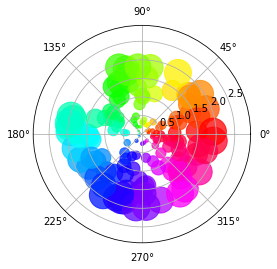

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
# the above line allows the plot to appear in the notebook
# see https://matplotlib.org/gallery/pie_and_polar_charts/polar_scatter.html#sphx-glr-gallery-pie-and-polar-charts-polar-scatter-py

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

For more details about various data vis, see VanderPlas, <i>Python data science handbook</i> and this site https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html.

<hr/>That&rsquo;s it for the moment.  <h4><i>Explore the fun of visualization.</i></h4>